In [94]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import pandas as pd
import numpy as np
from tqdm import tqdm
import time
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
import gc
tqdm.pandas()
gc.collect()

100

# LOAD

In [95]:
%%time
df = pd.read_feather('../data/2021玉山人工智慧公開挑戰賽冬季賽訓練資料集.feather')
df = df.loc[df.dt>=12,:] #取最近一年即可
print(df.shape,df.isnull().sum().sum())
df.head()

(19786604, 53) 1509444
Wall time: 1min 50s


,dt,chid,shop_tag,txn_cnt,txn_amt,domestic_offline_cnt,domestic_online_cnt,overseas_offline_cnt,overseas_online_cnt,domestic_offline_amt_pct,...,masts,educd,trdtp,naty,poscd,cuorg,slam,gender_code,age,primary_card
13188928,12.0,10115966.0,15,1.0,9678.450445,1.0,0.0,0.0,0.0,1.00,...,1.0,4.0,15.0,1.0,1.0,30.0,133000.939458,0.0,5.0,1.0
13188938,12.0,10115966.0,18,1.0,9624.614033,1.0,0.0,0.0,0.0,1.00,...,1.0,4.0,15.0,1.0,1.0,30.0,133000.939458,0.0,5.0,1.0
13188944,12.0,10115966.0,25,1.0,2338.181448,1.0,0.0,0.0,0.0,1.00,...,1.0,4.0,15.0,1.0,1.0,30.0,133000.939458,0.0,5.0,1.0
13188946,12.0,10115966.0,26,2.0,16627.150110,2.0,0.0,0.0,0.0,1.00,...,1.0,4.0,15.0,1.0,1.0,30.0,133000.939458,0.0,5.0,1.0
13188957,12.0,10115966.0,37,13.0,18485.113446,3.0,10.0,0.0,0.0,0.27,...,1.0,4.0,15.0,1.0,1.0,30.0,133000.939458,0.0,5.0,1.0


# 處理缺失值

In [96]:
%%time
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns
miss_table = missing_values_table(df)
miss_table

Your selected dataframe has 53 columns.
There are 9 columns that have missing values.
Wall time: 7.11 s


,Missing Values,% of Total Values
slam,1023527,5.2
gender_code,242749,1.2
age,242749,1.2
trdtp,365,0.0
educd,14,0.0
masts,10,0.0
naty,10,0.0
poscd,10,0.0
cuorg,10,0.0


# 補齊缺失值

In [97]:
mean_fill_col = ['slam'] 
for i in tqdm(mean_fill_col):
    df[i] = df[i].fillna(df[i].median())# 數值型用中位數補值(避免離群值拉高平均值)

cat_fill_col = ['gender_code','age','trdtp','educd','masts','naty','poscd','cuorg'] 
for i in tqdm(cat_fill_col):
    df[i] = df[i].fillna(-999)# 類別型用一個-999補值

miss_table = missing_values_table(df)
miss_table

100%|██████████| 8/8 [00:01<00:00,  5.39it/s]


Your selected dataframe has 53 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [98]:
df.columns

Index(['dt', 'chid', 'shop_tag', 'txn_cnt', 'txn_amt', 'domestic_offline_cnt',
       'domestic_online_cnt', 'overseas_offline_cnt', 'overseas_online_cnt',
       'domestic_offline_amt_pct', 'domestic_online_amt_pct',
       'overseas_offline_amt_pct', 'overseas_online_amt_pct', 'card_1_txn_cnt',
       'card_2_txn_cnt', 'card_3_txn_cnt', 'card_4_txn_cnt', 'card_5_txn_cnt',
       'card_6_txn_cnt', 'card_7_txn_cnt', 'card_8_txn_cnt', 'card_9_txn_cnt',
       'card_10_txn_cnt', 'card_11_txn_cnt', 'card_12_txn_cnt',
       'card_13_txn_cnt', 'card_14_txn_cnt', 'card_other_txn_cnt',
       'card_1_txn_amt_pct', 'card_2_txn_amt_pct', 'card_3_txn_amt_pct',
       'card_4_txn_amt_pct', 'card_5_txn_amt_pct', 'card_6_txn_amt_pct',
       'card_7_txn_amt_pct', 'card_8_txn_amt_pct', 'card_9_txn_amt_pct',
       'card_10_txn_amt_pct', 'card_11_txn_amt_pct', 'card_12_txn_amt_pct',
       'card_13_txn_amt_pct', 'card_14_txn_amt_pct', 'card_other_txn_amt_pct',
       'masts', 'educd', 'trdtp', 'naty

In [99]:
for i in df.columns:
    if 'pct' in i:
        print(i)

domestic_offline_amt_pct
domestic_online_amt_pct
overseas_offline_amt_pct
overseas_online_amt_pct
card_1_txn_amt_pct
card_2_txn_amt_pct
card_3_txn_amt_pct
card_4_txn_amt_pct
card_5_txn_amt_pct
card_6_txn_amt_pct
card_7_txn_amt_pct
card_8_txn_amt_pct
card_9_txn_amt_pct
card_10_txn_amt_pct
card_11_txn_amt_pct
card_12_txn_amt_pct
card_13_txn_amt_pct
card_14_txn_amt_pct
card_other_txn_amt_pct


In [100]:
for i in df.columns:
    if 'cnt' in i:
        print(i)

txn_cnt
domestic_offline_cnt
domestic_online_cnt
overseas_offline_cnt
overseas_online_cnt
card_1_txn_cnt
card_2_txn_cnt
card_3_txn_cnt
card_4_txn_cnt
card_5_txn_cnt
card_6_txn_cnt
card_7_txn_cnt
card_8_txn_cnt
card_9_txn_cnt
card_10_txn_cnt
card_11_txn_cnt
card_12_txn_cnt
card_13_txn_cnt
card_14_txn_cnt
card_other_txn_cnt


#  以下根據chid做groupby操作,並且因應各種不同類型的欄位作客製化統計運算(沿時間維度取mean之類的)

In [101]:
%%time
def create_groupby_chid_df(df,mean_or_median='mean',l1_or_l2='l1'):
    def personal_information_process(col):
        return df.groupby('chid')[col].agg(lambda x:x.values[-1]) 

    def pct_process(col):
        return df.groupby('chid')[col].agg(mean_or_median)
    
    def cnt_process(col):
        var = df.groupby('chid')[col].agg(mean_or_median)
        var.loc[:,:] = normalize(var,norm=l1_or_l2)
        return var

    個人資料欄位 = ['age','primary_card','trdtp','educd','gender_code','masts','poscd','naty','cuorg']
    
    # 百分比
    國內外百分比欄位 = df.columns[(df.columns.str.contains('domestic')|df.columns.str.contains('overseas'))&df.columns.str.contains('pct')]#pct
    卡片百分比欄位 = df.columns[df.columns.str.contains('card')&df.columns.str.contains('pct')]#pct

    # 次數
    國內外次數欄位 = df.columns[(df.columns.str.contains('domestic')|df.columns.str.contains('overseas'))&df.columns.str.contains('cnt')]#cnt
    卡片次數欄位 = df.columns[df.columns.str.contains('card')&df.columns.str.contains('cnt')]#cnt

    # 其他
    其他欄位 = ['slam','txn_amt','txn_cnt']
    
    var = personal_information_process(個人資料欄位)
    for pct_col in [國內外百分比欄位,卡片百分比欄位]:
        var =  pd.concat([var,pct_process(pct_col)],axis=1)
    for cnt_col in [國內外次數欄位,卡片次數欄位]:
        var =  pd.concat([var,cnt_process(cnt_col)],axis=1)
    df_groupby_chid = pd.concat([var,pct_process(其他欄位)],axis=1).reset_index()
    
    assert set(df.columns) - set(df_groupby_chid.columns) == {'shop_tag', 'dt'} # 確保df_groupby_chid沒有shop_tag和dt
    return df_groupby_chid

print(df.shape)
df_groupby_chid = create_groupby_chid_df(df)
print(df_groupby_chid.shape)
df_groupby_chid

(19786604, 53)
(500000, 51)
Wall time: 51.4 s


,chid,age,primary_card,trdtp,educd,gender_code,masts,poscd,naty,cuorg,...,card_9_txn_cnt,card_10_txn_cnt,card_11_txn_cnt,card_12_txn_cnt,card_13_txn_cnt,card_14_txn_cnt,card_other_txn_cnt,slam,txn_amt,txn_cnt
0,10000000.0,4.0,1.0,2.0,2.0,1.0,2.0,3.0,1.0,30.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,79557.742574,9701.914585,1.600000
1,10000001.0,5.0,1.0,11.0,4.0,0.0,2.0,3.0,1.0,30.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62730.806297,7977.560539,1.816327
2,10000002.0,3.0,1.0,13.0,4.0,0.0,2.0,99.0,1.0,30.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,79291.240239,6647.343469,1.000000
3,10000003.0,6.0,1.0,15.0,6.0,0.0,2.0,99.0,1.0,30.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,73926.209680,8288.806894,1.500000
4,10000004.0,2.0,1.0,15.0,5.0,1.0,2.0,99.0,1.0,30.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48209.277501,7076.586473,1.111111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,10499995.0,4.0,1.0,5.0,3.0,1.0,1.0,99.0,1.0,30.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,87397.101503,3716.334885,1.000000
499996,10499996.0,3.0,1.0,11.0,3.0,1.0,2.0,2.0,1.0,30.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55463.131267,11491.514477,1.291667
499997,10499997.0,3.0,1.0,8.0,6.0,0.0,1.0,2.0,1.0,30.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,72218.713500,6568.010877,1.692308
499998,10499998.0,4.0,1.0,13.0,6.0,1.0,2.0,99.0,1.0,30.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,62417.960432,13384.207376,3.304348


In [102]:
# 百分比
國內外百分比欄位 = df.columns[(df.columns.str.contains('domestic')|df.columns.str.contains('overseas'))&df.columns.str.contains('pct')]#pct
卡片百分比欄位 = df.columns[df.columns.str.contains('card')&df.columns.str.contains('pct')]#pct

# 次數
國內外次數欄位 = df.columns[(df.columns.str.contains('domestic')|df.columns.str.contains('overseas'))&df.columns.str.contains('cnt')]#cnt
卡片次數欄位 = df.columns[df.columns.str.contains('card')&df.columns.str.contains('cnt')]#cnt
print(國內外百分比欄位)
print(卡片百分比欄位)
print(國內外次數欄位)
print(卡片次數欄位)

Index(['domestic_offline_amt_pct', 'domestic_online_amt_pct',
       'overseas_offline_amt_pct', 'overseas_online_amt_pct'],
      dtype='object')
Index(['card_1_txn_amt_pct', 'card_2_txn_amt_pct', 'card_3_txn_amt_pct',
       'card_4_txn_amt_pct', 'card_5_txn_amt_pct', 'card_6_txn_amt_pct',
       'card_7_txn_amt_pct', 'card_8_txn_amt_pct', 'card_9_txn_amt_pct',
       'card_10_txn_amt_pct', 'card_11_txn_amt_pct', 'card_12_txn_amt_pct',
       'card_13_txn_amt_pct', 'card_14_txn_amt_pct', 'card_other_txn_amt_pct'],
      dtype='object')
Index(['domestic_offline_cnt', 'domestic_online_cnt', 'overseas_offline_cnt',
       'overseas_online_cnt'],
      dtype='object')
Index(['card_1_txn_cnt', 'card_2_txn_cnt', 'card_3_txn_cnt', 'card_4_txn_cnt',
       'card_5_txn_cnt', 'card_6_txn_cnt', 'card_7_txn_cnt', 'card_8_txn_cnt',
       'card_9_txn_cnt', 'card_10_txn_cnt', 'card_11_txn_cnt',
       'card_12_txn_cnt', 'card_13_txn_cnt', 'card_14_txn_cnt',
       'card_other_txn_cnt'],
      dtyp

In [103]:
for i in [國內外百分比欄位,卡片百分比欄位,國內外次數欄位,卡片次數欄位]:
    print(df_groupby_chid[i].sum(axis=1).mean())

1.0000012228088726
1.0000004432837233
0.9999391945531909
0.9999514307308185


In [104]:
df_groupby_chid['chid'].nunique() #確認應該有50萬筆

500000

# 做資料預處理(one_hot和標準化轉換),把資料欄位都變成數值型態特徵

In [105]:
%%time
from sklearn.preprocessing import scale
import warnings 
warnings.filterwarnings('ignore')

def preprocess_for_knn(df_groupby_chid):
    '''
    # 1.對類別欄位做one hot encoding(保留one_hot欄位刪除原始欄位)
    # 2.做scale轉換
    '''
    categorical_df = pd.DataFrame()
    categorical_features = ['masts','educd','trdtp','naty','poscd','cuorg','gender_code','age','primary_card']
    for c_name in categorical_features:
        df_groupby_chid[c_name] = pd.to_numeric(df_groupby_chid[c_name])
        one_hot = pd.get_dummies(df_groupby_chid[c_name])
        one_hot.columns = [ c_name + '_' + str(i) for i in one_hot.columns]
        if len(categorical_df) == 0:
            categorical_df = one_hot
        else:
            categorical_df = pd.concat([categorical_df,one_hot],axis=1)
    
    # 刪掉原始類別欄位,加入one_hot版本類別欄位        
    df_groupby_chid = df_groupby_chid.drop(categorical_features,axis=1)
    df_groupby_chid = pd.concat([df_groupby_chid,categorical_df],axis=1)
    
    # 做標準化轉換(除了chid以外)
    scale_col = list(set(df_groupby_chid.columns) - set(['chid']))
    df_groupby_chid[scale_col] = scale(df_groupby_chid[scale_col],axis=0)
    return df_groupby_chid

df_groupby_chid_preprocessed = preprocess_for_knn(df_groupby_chid)
print(df_groupby_chid_preprocessed.shape)
df_groupby_chid_preprocessed


(500000, 148)
Wall time: 13.1 s


,chid,domestic_offline_amt_pct,domestic_online_amt_pct,overseas_offline_amt_pct,overseas_online_amt_pct,card_1_txn_amt_pct,card_2_txn_amt_pct,card_3_txn_amt_pct,card_4_txn_amt_pct,card_5_txn_amt_pct,...,age_2.0,age_3.0,age_4.0,age_5.0,age_6.0,age_7.0,age_8.0,age_9.0,primary_card_0.0,primary_card_1.0
0,10000000.0,-0.496861,0.773526,-0.096182,-0.435581,-0.437361,-0.432504,-0.164106,-0.633559,-0.193868,...,-0.419145,-0.621392,1.680625,-0.476502,-0.315847,-0.136068,-0.042275,-0.007616,-0.29984,0.29984
1,10000001.0,0.367163,-0.192007,-0.096182,-0.435581,0.425479,1.644711,-0.164106,-0.633559,-0.193868,...,-0.419145,-0.621392,-0.595017,2.098627,-0.315847,-0.136068,-0.042275,-0.007616,-0.29984,0.29984
2,10000002.0,-0.000899,0.219296,-0.096182,-0.435581,-0.437361,-0.432504,-0.164106,1.747482,-0.193868,...,-0.419145,1.609290,-0.595017,-0.476502,-0.315847,-0.136068,-0.042275,-0.007616,-0.29984,0.29984
3,10000003.0,1.126289,-1.040320,-0.096182,-0.435581,-0.437361,-0.432504,-0.164106,-0.633559,-0.193868,...,-0.419145,-0.621392,-0.595017,-0.476502,3.166093,-0.136068,-0.042275,-0.007616,-0.29984,0.29984
4,10000004.0,-0.902649,0.639167,-0.096182,0.797201,-0.437361,-0.432504,-0.164106,1.747482,-0.193868,...,2.385812,-0.621392,-0.595017,-0.476502,-0.315847,-0.136068,-0.042275,-0.007616,-0.29984,0.29984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,10499995.0,-2.255274,-1.040320,-0.096182,7.489447,-0.437361,-0.432504,-0.164106,-0.633559,-0.193868,...,-0.419145,-0.621392,1.680625,-0.476502,-0.315847,-0.136068,-0.042275,-0.007616,-0.29984,0.29984
499996,10499996.0,0.562695,-0.410512,-0.096182,-0.435581,-0.437361,2.450882,-0.164106,-0.633559,-0.193868,...,-0.419145,1.609290,-0.595017,-0.476502,-0.315847,-0.136068,-0.042275,-0.007616,-0.29984,0.29984
499997,10499997.0,0.416161,-0.246762,-0.096182,-0.435581,2.648710,-0.432504,-0.164106,-0.633559,-0.193868,...,-0.419145,1.609290,-0.595017,-0.476502,-0.315847,-0.136068,-0.042275,-0.007616,-0.29984,0.29984
499998,10499998.0,0.758728,-1.040320,-0.096182,0.425835,-0.437361,-0.432504,-0.164106,-0.633559,-0.193868,...,-0.419145,-0.621392,1.680625,-0.476502,-0.315847,-0.136068,-0.042275,-0.007616,-0.29984,0.29984


100%|██████████| 100/100 [00:25<00:00,  3.88it/s]


65.0

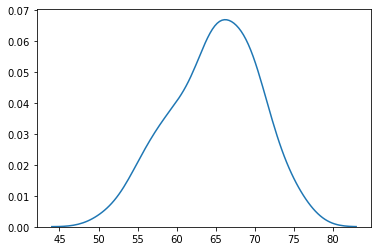

In [106]:
# Standardization：
# newX = (X- 均值) / 標準差(standard deviation)， newX 的均值=0，方差= 1,可用於發現離羣點
import seaborn as sns
lst = []
for i in tqdm(range(100)):
    a = df_groupby_chid_preprocessed.sample(9999).describe().T
    lst.append(a[a['std']>=1.0].shape[0])
sns.kdeplot(lst)
np.median(lst)

# 特徵維度太多先用pca降維

In [107]:
from sklearn.decomposition import PCA
pca = PCA(n_components=64)
X = df_groupby_chid_preprocessed.drop('chid',axis=1).values
X_pca = pca.fit_transform(X)
X_pca.shape

(500000, 64)

# 建立knn模型

In [108]:
%%time
from sklearn.neighbors import NearestNeighbors
nbrs = NearestNeighbors(
    n_neighbors = 42, 
    algorithm = 'ball_tree',
    leaf_size = 42,
    n_jobs = -1,
    p = 1).fit(X_pca)
nbrs

Wall time: 14.9 s


NearestNeighbors(algorithm='ball_tree', leaf_size=42, n_jobs=-1, n_neighbors=42,
                 p=1)

# 試用knn模型

In [109]:
distances, indices = nbrs.kneighbors(X_pca[[0]]) # 將該chid的"特徵"丟入"knn"
source_chid = df_groupby_chid_preprocessed.iloc[0]['chid']
target_chids = df_groupby_chid_preprocessed.loc[indices[0][-(nbrs.n_neighbors-1):]]['chid'].values.tolist()
print(f'source_chid:{source_chid}')
print('distance由小到大',dict(zip(distances[0][1:],target_chids)))

source_chid:10000000.0
distance由小到大 {1.6355811932737803: 10141830.0, 1.9766612476958711: 10160475.0, 2.053963768201143: 10030875.0, 2.9774107360226383: 10054131.0, 6.719146764034701: 10095545.0, 8.880623076225447: 10396783.0, 9.039209091214234: 10409524.0, 9.214300233616447: 10467301.0, 9.232943511738357: 10054232.0, 10.439991542668: 10377725.0, 10.824550203063378: 10161173.0, 12.079084668713119: 10107286.0, 13.042919236152303: 10478866.0, 13.191880363193468: 10077169.0, 13.424258191434411: 10125650.0, 13.429717741650482: 10073873.0, 14.040356319607245: 10484428.0, 14.04150322095427: 10220812.0, 14.131769715267126: 10003724.0, 14.26115113308683: 10133405.0, 14.751491455999819: 10256882.0, 14.89369880494987: 10253544.0, 14.922753301595053: 10014180.0, 14.992221760972045: 10109205.0, 15.110315382447185: 10258960.0, 15.149868276597227: 10202863.0, 15.254251565352604: 10450140.0, 15.331048548615664: 10142145.0, 15.395440522147448: 10195476.0, 15.452695504577168: 10463791.0, 15.627815607469

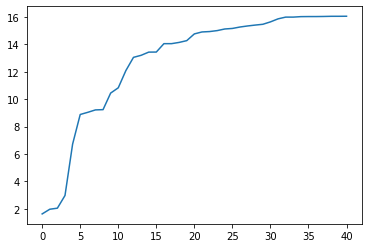

In [110]:
plt.plot(distances[0][1:])

In [111]:
source_chid_shop_tag = df.loc[df.chid == source_chid,'shop_tag'].value_counts().index.values.tolist()
target_chid_shop_tag = df.loc[df.chid.isin(target_chids),'shop_tag'].value_counts().index.values.tolist()
print(source_chid_shop_tag,target_chid_shop_tag)
print('交集百分比:',len(set(source_chid_shop_tag)&set(target_chid_shop_tag))/min(len(set(source_chid_shop_tag)),len(set(target_chid_shop_tag))))

['10', '45', '12', 'other', '46', '48'] ['other', '45', '10', '37', '15', '36', '48', '12', '2', '46', '6', '31', '26', '32', '25', '39', '16', '21', '17', '19', '33', '18', '13', '9', '11', '22', '34', '23', '47', '1', '42', '38', '20', '35', '41', '7', '14', '30', '28', '3']
交集百分比: 1.0


In [112]:
lst = []
for i in tqdm(range(20)):
    source_chid = np.random.choice(df['chid'].values)
    idx = df_groupby_chid_preprocessed[df_groupby_chid_preprocessed.chid==source_chid].index[0]
    distances, indices = nbrs.kneighbors(X_pca[[idx]])
    target_chids = df_groupby_chid_preprocessed.loc[indices[0][-(nbrs.n_neighbors-1):]]['chid'].values.tolist()
    source_chid_shop_tag = df.loc[df.chid == source_chid,'shop_tag'].value_counts().index.values.tolist()[:5]
    target_chid_shop_tag = df.loc[df.chid.isin(target_chids),'shop_tag'].value_counts().index.values.tolist()[:5]
    交集百分比 = len(set(source_chid_shop_tag)&set(target_chid_shop_tag))/min(len(set(source_chid_shop_tag)),len(set(target_chid_shop_tag)))
    lst.append(交集百分比)
lst

100%|██████████| 20/20 [00:20<00:00,  1.04s/it]


[0.8,
 0.8,
 0.4,
 0.6,
 1.0,
 0.6,
 0.6,
 0.4,
 0.6,
 0.8,
 0.6,
 0.6,
 0.8,
 0.6,
 0.0,
 0.25,
 0.0,
 0.8,
 0.6,
 0.4]

<AxesSubplot:>

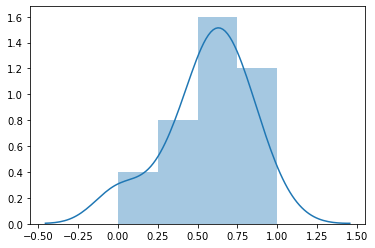

In [113]:
sns.distplot(lst)

# 以上實驗驗證了相似的chid有相似的shop_tag
# 因此未來在預測上如果當下chid無法集滿三個shop_tag,可以搜索相似chid的shop_tag

In [114]:
import joblib

# 保存knn模型
joblib.dump(nbrs,'../model/nbrs.pkl')
# 保存X_pca
joblib.dump(X_pca,'../model/X_pca_for_knn.pkl')
# 保存df_groupby_chid_preprocessed
df_groupby_chid_preprocessed.to_feather('../data/df_groupby_chid_preprocessed.feather')

In [115]:
#ok